### Import Libraries

In [222]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
plt.rcParams['figure.figsize'] = 15,6

### Functions

In [223]:
#function to get nigeria data from worldbank data then transpose
def WB_Transpose(table, col, col_content):
    table = pd.DataFrame(table[table[col] == col_content])
    table = pd.DataFrame(table.transpose())
    return table

#function to switch index
def switch_index(table, col):
    table.index.name= col
    table[col]=table.index
    table = table.reset_index(drop=True)
    return table

#function to treat worldbank time series data
def WB_Treat(table,table2):
    table = WB_Transpose(table, 'Country Name', 'Nigeria')
    table = switch_index(table, 'Year')
    table = pd.DataFrame(table[4:])
    table.columns = [table2, 'Year']
    table = table.reset_index(drop=True)
    return table

#Function plots a graphical correlation matrix for each pair of columns in the dataframe.
def plot_corr(df, size):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr, cmap='summer')   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks


### Read All CSV Files

In [224]:
Gdp = pd.read_csv('Gdp.csv', skiprows=4)
GdpGrowth = pd.read_csv('GdpGrowth.csv', skiprows=4)
CapitalExpenditure = pd.read_csv('CapitalExpenditure.csv', skiprows=1)
EconomicFreedom = pd.read_csv('EconomicFreedom.csv', skiprows=4)
Export = pd.read_csv('Export.csv', skiprows=4)
Import = pd.read_csv('Import.csv', skiprows=4)
Fdi = pd.read_csv('Fdi.csv', skiprows=4)
Forex = pd.read_csv('Forex.csv', skiprows=4)
Inflation = pd.read_csv('Inflation.csv', skiprows=4)
InterestRate = pd.read_csv('InterestRate.csv', skiprows=4)
Population = pd.read_csv('Population.csv', skiprows=4)
PrimarySchoolPupils = pd.read_csv('PrimarySchoolPupils.csv', skiprows=4)

#CapitalExpenditure[:11]

### Clean WorldBank Data

In [225]:
Gdp = WB_Treat(Gdp,'Gdp')
GdpGrowth = WB_Treat(GdpGrowth,'GdpGrowth')
Export = WB_Treat(Export,'Export')
Import = WB_Treat(Import,'Import')
Fdi = WB_Treat(Fdi,'Fdi')
Forex = WB_Treat(Forex,'Forex')
Inflation = WB_Treat(Inflation,'Inflation')
InterestRate = WB_Treat(InterestRate,'InterestRate')
Population = WB_Treat(Population,'Population')
PrimarySchoolPupils = WB_Treat(PrimarySchoolPupils,'PrimarySchoolPupils')

### Clean Economic Freedom index data

In [226]:
EconomicFreedom = EconomicFreedom.drop(columns=['Unnamed: 0', 'ISO_Code', 'Quartile', 'Government Consumption',
       '1A data', 'Transfers and subsidies', '1B data',
       'Government enterprises and investment', '1C data',
       'Top marginal income tax rate', '1Di data',
       'Top marginal income and payroll tax rate', '1Dii data',
       'Top marginal tax rate', 'Size of Government', 'Judicial independence',
       'Impartial courts', 'Protection of property rights',
       ' Military interference in rule of law and politics',
       'Integrity of the legal system', 'Legal enforcement of contracts',
       'Regulatory restrictions on the sale of real property',
       'Reliability of police', 'Business costs of crime', 'Gender Adjustment',
       'Legal System & Property Rights', 'Money growth', '3A data',
       'Standard deviation of inflation', '3B data',
       'Inflation: Most recent year', '3C data',
       'Freedom to own foreign currency bank accounts', 'Sound Money',
       ' Revenue from trade taxes (% of trade sector)', '4Ai data',
       'Mean tariff rate', '4Aii data', 'Standard deviation of tariff rates',
       '4Aiii data', 'Tariffs', ' Non-tariff trade barriers',
       'Compliance costs of importing and exporting',
       ' Regulatory trade barriers', 'Black market exchange rates',
       'Foreign ownership/investment restrictions', 'Capital controls',
       'Freedom of foreigners to visit',
       'Controls of the movement of capital and people',
       'Freedom to trade internationally', 'Ownership of banks',
       'Private sector credit',
       'Interest rate controls/negative real interest rates)',
       'Credit market regulations', 'Hiring regulations and minimum wage',
       'Hiring and firing regulations', 'Centralized collective bargaining',
       'Hours Regulations', 'Mandated cost of worker dismissal',
       'Conscription', 'Labor market regulations',
       'Administrative requirements', 'Bureaucracy costs',
       'Starting a business', 'Extra payments/bribes/favoritism',
       'Licensing restrictions', 'Tax compliance', 'Business regulations',
       'Regulation'])

EconomicFreedom = pd.DataFrame(EconomicFreedom[EconomicFreedom['Countries'] == 'Nigeria'])
EconomicFreedom = EconomicFreedom.drop(columns=['Countries'])
EconomicFreedom = EconomicFreedom.reset_index(drop=True)
len(EconomicFreedom)

22

In [227]:
CapitalExpenditure = WB_Transpose(CapitalExpenditure, 'Sources ', 'Capital Expenditure 2')
CapitalExpenditure = switch_index(CapitalExpenditure, 'Year')
CapitalExpenditure = pd.DataFrame(CapitalExpenditure[1:])
CapitalExpenditure.columns = ['CapitalExpenditure', 'Year']

CapitalExpenditure = CapitalExpenditure.reset_index(drop=True)
len(CapitalExpenditure)

47

### Merge Data

In [228]:
GdpPredictor = pd.merge(left=Gdp,right=GdpGrowth, on='Year',left_index=True,right_index=True)

#GdpPredictor = pd.merge(left=GdpPredictor,right=EconomicFreedom, on='Year',left_index=True,right_index=True)
#GdpPredictor = pd.merge(left=GdpPredictor,right=Export, on='Year',left_index=True,right_index=True)
#GdpPredictor = pd.merge(left=GdpPredictor,right=Import, on='Year',left_index=True,right_index=True)
GdpPredictor = pd.merge(left=GdpPredictor,right=Fdi, on='Year',left_index=True,right_index=True)
GdpPredictor = pd.merge(left=GdpPredictor,right=Forex, on='Year',left_index=True,right_index=True)
GdpPredictor = pd.merge(left=GdpPredictor,right=Inflation, on='Year',left_index=True,right_index=True)
GdpPredictor = pd.merge(left=GdpPredictor,right=InterestRate, on='Year',left_index=True,right_index=True)
#GdpPredictor = pd.merge(left=GdpPredictor,right=Population, on='Year',left_index=True,right_index=True)
#GdpPredictor = pd.merge(left=GdpPredictor,right=PrimarySchoolPupils, on='Year',left_index=True,right_index=True)
#GdpPredictor = pd.merge(left=GdpPredictor,right=CapitalExpenditure, on='Year',left_index=True,right_index=True)
GdpPredictor.head()

,Gdp,Year,GdpGrowth,Fdi,Forex,Inflation,InterestRate
0,4.19609e+09,1960,NaN,NaN,0.714286,5.44433,NaN
1,4.4672e+09,1961,0.191795,NaN,0.714286,6.27915,NaN
2,4.9093e+09,1962,4.10299,NaN,0.714286,5.26563,NaN
3,5.16549e+09,1963,8.57862,NaN,0.714286,-2.69466,NaN
4,5.55282e+09,1964,4.95049,NaN,0.714286,0.856793,NaN


In [229]:
GdpPredictor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
Gdp             57 non-null object
Year            59 non-null object
GdpGrowth       56 non-null object
Fdi             40 non-null object
Forex           58 non-null object
Inflation       57 non-null object
InterestRate    46 non-null object
dtypes: object(7)
memory usage: 3.3+ KB


### Remove all NaN in Dataframe

In [230]:
GdpPredictor = GdpPredictor.dropna(how='any')
GdpPredictor = GdpPredictor.reset_index(drop=True)
GdpPredictor.head()                              

,Gdp,Year,GdpGrowth,Fdi,Forex,Inflation,InterestRate
0,3.60354e+10,1977,6.02412,-4.40514e+08,0.644701,15.0878,-4.2576
1,3.65279e+10,1978,-5.76416,-2.10933e+08,0.635272,21.7092,-6.28957
2,6.42018e+10,1980,4.20483,7.3887e+08,0.546781,9.97226,-3.54742
3,6.10765e+10,1981,-13.1279,-5.42327e+08,0.617708,20.8128,-8.05542
4,5.13975e+10,1982,-1.05319,-4.30611e+08,0.673461,7.69775,4.49126


### Convert to correct datatypes

In [231]:
GdpPredictor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 7 columns):
Gdp             39 non-null object
Year            39 non-null object
GdpGrowth       39 non-null object
Fdi             39 non-null object
Forex           39 non-null object
Inflation       39 non-null object
InterestRate    39 non-null object
dtypes: object(7)
memory usage: 2.2+ KB


In [232]:
GdpPredictor.Gdp = GdpPredictor['Gdp'].astype(float)
GdpPredictor.Year = GdpPredictor['Year'].astype(int)
GdpPredictor.GdpGrowth = GdpPredictor['GdpGrowth'].astype(float)
#GdpPredictor.Export = GdpPredictor['Export'].astype(float)
#GdpPredictor.Import = GdpPredictor['Import'].astype(float)
GdpPredictor.Fdi = GdpPredictor['Fdi'].astype(float)
GdpPredictor.Forex = GdpPredictor['Forex'].astype(float)
GdpPredictor.Inflation = GdpPredictor['Inflation'].astype(float)
GdpPredictor.InterestRate = GdpPredictor['InterestRate'].astype(float)
#GdpPredictor.Population = GdpPredictor['Population'].astype(float)
#GdpPredictor.CapitalExpenditure = GdpPredictor['CapitalExpenditure'].astype(float)
GdpPredictor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 7 columns):
Gdp             39 non-null float64
Year            39 non-null int64
GdpGrowth       39 non-null float64
Fdi             39 non-null float64
Forex           39 non-null float64
Inflation       39 non-null float64
InterestRate    39 non-null float64
dtypes: float64(6), int64(1)
memory usage: 2.2 KB


### Change export and import as a percentage of gdp to actual

In [233]:
#GdpPredictor['Exp'] = GdpPredictor.Gdp * (GdpPredictor.Export/100)
#GdpPredictor['Imp'] = GdpPredictor.Gdp * (GdpPredictor.Import/100)
#GdpPredictor = GdpPredictor.drop(columns = ['Export','Import', 'Year'])
#GdpPredictor.columns = ['Gdp', 'GdpGrowth', 'Fdi', 'Forex','Inflation','InterestRate','Population','CapitalExpenditure','Export','Import']
#GdpPredictor.head()   

GdpPredictor = GdpPredictor.drop(columns = ['Year'])


### Check Case distribution

Rare events are hard to predict


In [234]:
num_obs = len(GdpPredictor)
num_increase = len(GdpPredictor.loc[GdpPredictor['GdpGrowth'] > 0])
num_decrease = len(GdpPredictor.loc[GdpPredictor['GdpGrowth'] < 0])
print("Number of Increase cases:  {0} ({1:2.2f}%)".format(num_increase, (num_increase/num_obs) * 100))
print("Number of Decrease cases: {0} ({1:2.2f}%)".format(num_decrease, (num_decrease/num_obs) * 100))

Number of Increase cases:  29 (74.36%)
Number of Decrease cases: 10 (25.64%)


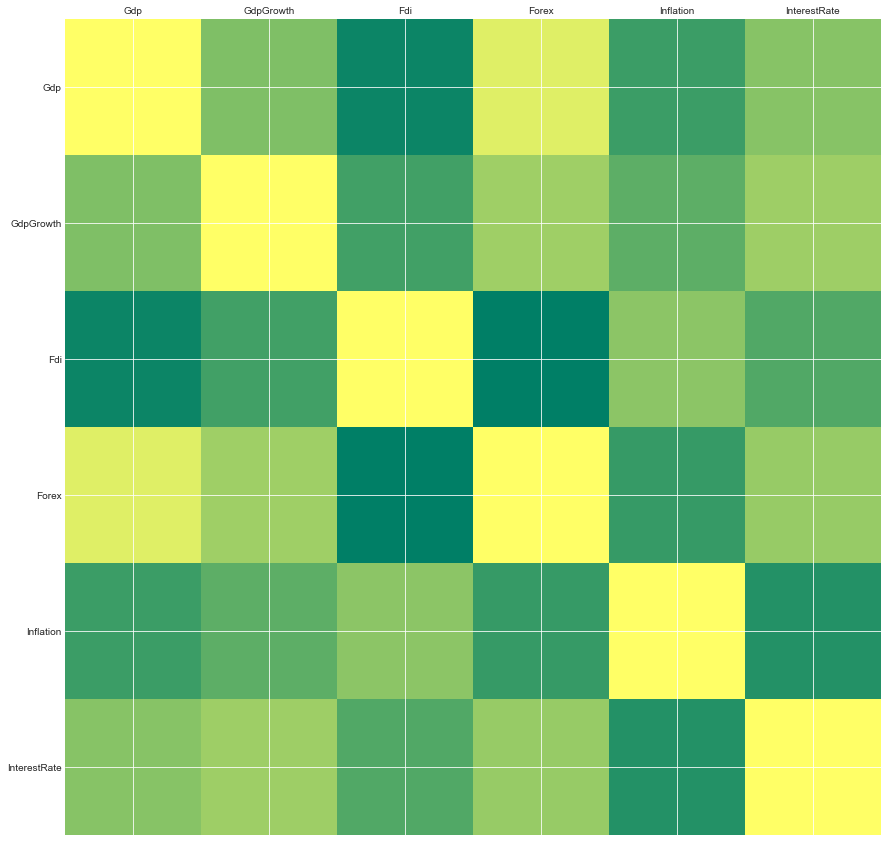

In [235]:
plot_corr(GdpPredictor, 15)

In [236]:
GdpPredictor.corr()

,Gdp,GdpGrowth,Fdi,Forex,Inflation,InterestRate
Gdp,1.000000,0.139918,-0.630894,0.780461,-0.317952,0.192215
GdpGrowth,0.139918,1.000000,-0.271447,0.351522,-0.089131,0.344456
Fdi,-0.630894,-0.271447,1.000000,-0.718050,0.224168,-0.172075
Forex,0.780461,0.351522,-0.718050,1.000000,-0.350014,0.296015
Inflation,-0.317952,-0.089131,0.224168,-0.350014,1.000000,-0.477434
InterestRate,0.192215,0.344456,-0.172075,0.296015,-0.477434,1.000000


### Visualise Data

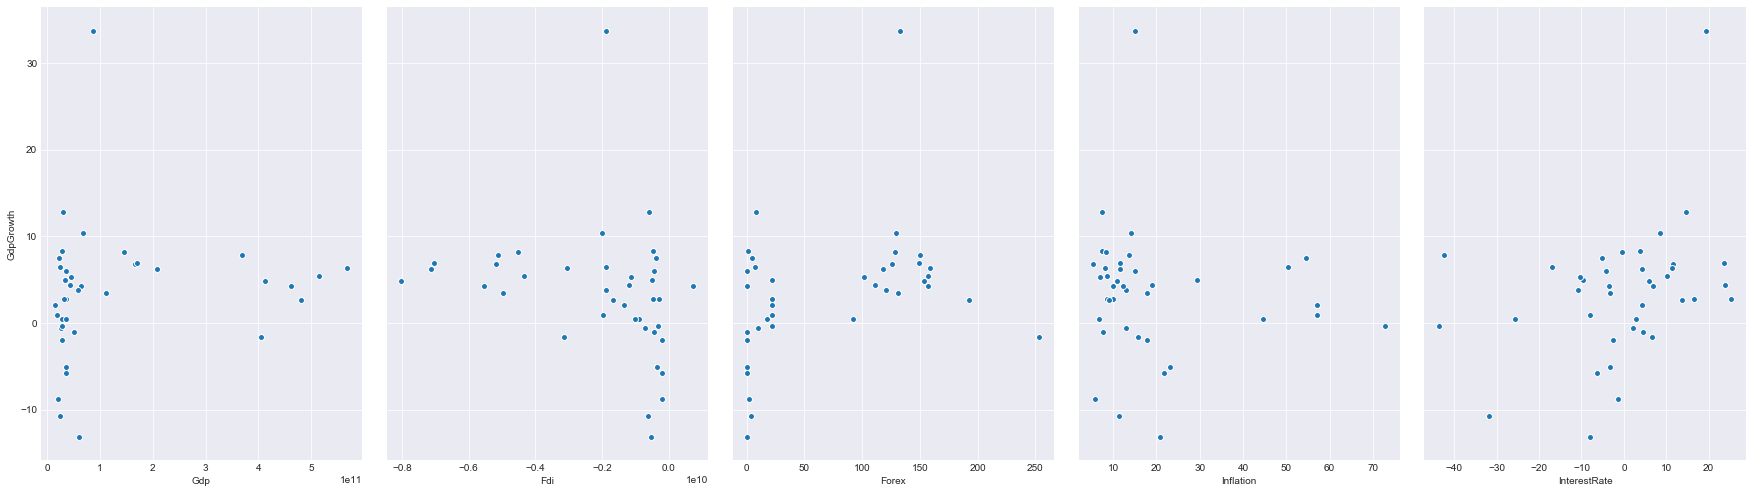

In [237]:
sns.pairplot(GdpPredictor, x_vars=['Gdp', 'Fdi', 'Forex', 'Inflation', 'InterestRate'], y_vars='GdpGrowth', size=7, aspect=0.7)


##### Spliting the data

75% for training & 25% for testing; because of the small amount of data


In [238]:
from sklearn.cross_validation import train_test_split

feature_col_names = ['Gdp', 'Fdi', 'Forex', 'Inflation', 'InterestRate']
predicted_class_names = ['GdpGrowth']

X = GdpPredictor[feature_col_names].values     # predictor feature columns (5 X m)
y = GdpPredictor[predicted_class_names].values # predicted class column (1 X m)
split_test_size = 0.25

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 
                            # test_size = 0.45 is 45%, 42 is the answer to everything

In [239]:
print("{0:0.2f}% in training set".format((len(X_train)/len(GdpPredictor.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(GdpPredictor.index)) * 100))

74.36% in training set
25.64% in test set


### Training Initial Algorithm - Lasso Regression

In [240]:
from sklearn.linear_model import Lasso

# create lasso regression model object and train it with the data
lasso_model = Lasso()

lasso_model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

#### Check R-square on training data

In [241]:
lasso_model.score(X_train, y_train)

0.20812505822271776

#### Coefficients when using Lasso

In [242]:
predictors = ['Gdp', 'Fdi', 'Forex', 'Inflation', 'InterestRate']
lasso_coef = pd.Series(lasso_model.coef_,predictors).sort_values()
print(lasso_coef)

Fdi            -1.113969e-09
Gdp            -8.141620e-12
Forex           1.222889e-02
Inflation       4.349918e-02
InterestRate    9.641316e-02
dtype: float64


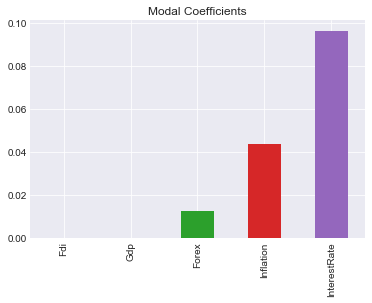

In [243]:
from pandas import Series
%matplotlib inline

lasso_coef.plot(kind='bar', title='Modal Coefficients')

#### Make predictions on test data

In [244]:
y_predict = lasso_model.predict(X_test)

#### Compare predicted and actual values of GDPGrowth - Lasso

Populating the interactive namespace from numpy and matplotlib


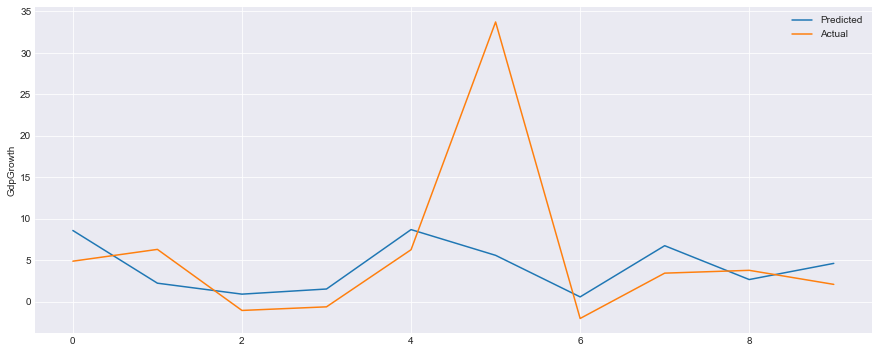

In [245]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test, label='Actual')
plt.ylabel('GdpGrowth')

plt.legend()
plt.show()

#### Check R-square value on test data

In [246]:
r_square = lasso_model.score(X_test, y_test)
r_square

0.09658925501353066

#### Is the root mean square error any better?

In [247]:
from sklearn.metrics import mean_squared_error
lasso_model_mse = mean_squared_error(y_predict, y_test)
math.sqrt(lasso_model_mse)

9.285002165888478

### Training Initial Algorithm - multiple linear regression

In [248]:
from sklearn.linear_model import LinearRegression
ML_model = LinearRegression(normalize=True)
ML_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

#### Check R-square on training data

In [249]:
ML_model.score(X_train, y_train)

0.20850746586553526

#### Coefficients when using SVR

In [250]:
ML_coef = Series(ML_model.coef_[0],predictors).sort_values()
ML_coef

Fdi            -1.103625e-09
Gdp            -8.104126e-12
Forex           1.268538e-02
Inflation       5.071821e-02
InterestRate    1.031625e-01
dtype: float64

### Building the optimal model using backward elimination

In [251]:
# Add column of ones assocaited with b0 constant because statsmodel doesnt take into cognizance of b0 constant
import statsmodels.formula.api as sm
#X = np.append(arr = X, values = np.ones((50, 1)).astype(int), axis = 1)
# reverse above to add new column of ones to the left of X rather than to the right
X = np.append(arr = np.ones((39, 1)).astype(int), values = X, axis = 1)

pd.DataFrame(X).head()

,0,1,2,3,4,5
0,1.0,3.603541e+10,-4.405142e+08,0.644701,15.087834,-4.257605
1,1.0,3.652786e+10,-2.109333e+08,0.635272,21.709246,-6.289568
2,1.0,6.420179e+10,7.388700e+08,0.546781,9.972262,-3.547418
3,1.0,6.107649e+10,-5.423273e+08,0.617708,20.812823,-8.055419
4,1.0,5.139746e+10,-4.306113e+08,0.673461,7.697747,4.491262


In [252]:
# step 1 select significant level (e.g SL = 0.05)
# step 2 fit full model with all possible predictors
X_opt = X[:, [0,1,2,3,4]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()

In [253]:
# step 3 consider the predictor with the highest P-value; 
# if P>SL,go to step 4, otherwise the model is ready
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     1.791
Date:                Sat, 02 Jun 2018   Prob (F-statistic):              0.153
Time:                        16:50:23   Log-Likelihood:                -129.53
No. Observations:                  39   AIC:                             269.1
Df Residuals:                      34   BIC:                             277.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5084      2.465      0.206      0.838      -4.500       5.517
x1         -1.625e-11   1.15e-11     -1.413      0.167   -3.96e-11    7.12e-12
x2         -2.982e-10   7.49e-10     -0.398      0.693   -1.82e-09    1.22e-09
x3             0.0594      0.030      2.000      0.054      -0.001       0.120
x4             0.0077      0.073      0.105      0.917      -0.141       0.156
==============================================================================
Omnibus:                       19.641   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.526
Skew:                           1.212   Prob(JB):                     4.31e-09
Kurtosis:                       7.223   Cond. No.                     4.46e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.46e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [254]:
# step 1 select significant level (e.g SL = 0.05)
# step 2 fit full model with all possible predictors
X_opt = X[:, [0,1,2,3]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()

In [255]:
# step 3 consider the predictor with the highest P-value; 
# if P>SL,go to step 4, otherwise the model is ready
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     2.454
Date:                Sat, 02 Jun 2018   Prob (F-statistic):             0.0795
Time:                        16:50:23   Log-Likelihood:                -129.53
No. Observations:                  39   AIC:                             267.1
Df Residuals:                      35   BIC:                             273.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7000      1.635      0.428      0.671      -2.618       4.019
x1         -1.635e-11   1.13e-11     -1.447      0.157   -3.93e-11    6.58e-12
x2         -3.025e-10   7.38e-10     -0.410      0.684    -1.8e-09    1.19e-09
x3             0.0588      0.029      2.042      0.049       0.000       0.117
==============================================================================
Omnibus:                       19.510   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.261
Skew:                           1.202   Prob(JB):                     4.92e-09
Kurtosis:                       7.215   Cond. No.                     3.00e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  3e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [256]:
# step 1 select significant level (e.g SL = 0.05)
# step 2 fit full model with all possible predictors
X_opt = X[:, [0,1,3]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()

In [257]:
# step 3 consider the predictor with the highest P-value; 
# if P>SL,go to step 4, otherwise the model is ready
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     3.682
Date:                Sat, 02 Jun 2018   Prob (F-statistic):             0.0351
Time:                        16:50:23   Log-Likelihood:                -129.63
No. Observations:                  39   AIC:                             265.3
Df Residuals:                      36   BIC:                             270.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8424      1.579      0.534      0.597      -2.360       4.044
x1          -1.56e-11    1.1e-11     -1.416      0.165   -3.79e-11    6.74e-12
x2             0.0643      0.025      2.552      0.015       0.013       0.115
==============================================================================
Omnibus:                       17.518   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.412
Skew:                           1.084   Prob(JB):                     9.16e-08
Kurtosis:                       6.905   Cond. No.                     2.93e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.93e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [258]:
# step 1 select significant level (e.g SL = 0.05)
# step 2 fit full model with all possible predictors
X_opt = X[:, [0,3]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()

In [259]:
# step 3 consider the predictor with the highest P-value; 
# if P>SL,go to step 4, otherwise the model is ready
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     5.217
Date:                Sat, 02 Jun 2018   Prob (F-statistic):             0.0282
Time:                        16:50:24   Log-Likelihood:                -130.68
No. Observations:                  39   AIC:                             265.4
Df Residuals:                      37   BIC:                             268.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7925      1.600      0.495      0.623      -2.449       4.034
x1             0.0365      0.016      2.284      0.028       0.004       0.069
==============================================================================
Omnibus:                       23.552   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.132
Skew:                           1.363   Prob(JB):                     2.38e-13
Kurtosis:                       8.324   Cond. No.                         141.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""